<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [3]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

In [29]:
from sklearn.neighbors import NearestNeighbors as nn
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer as tv
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline



In [6]:


import spacy

from spacy.tokenizer import Tokenizer
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.0.0/en_core_web_sm-2.0.0.tar.gz --no-deps


     |████████████████████████████████| 37.4MB 15.2MB/s eta 0:00:01
  Stored in directory: /Users/Bearcave/Library/Caches/pip/wheels/54/7c/d8/f86364af8fbba7258e14adae115f18dd2c91552406edc3fdaa
Successfully built en-core-web-sm


In [33]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

yelp.columns.tolist()

['business_id',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id']

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [ ]:
def tokenize(doc):
    
    return[token for token in simple_preprocess(doc) if token not in STOPWORDS]

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [14]:
tokens = []

for i in np.arange(len(yelp)):

    token = tokenize(yelp['text'][i])
    tokens.append(token)
    
yelp['tokens'] = tokens

doc = yelp['tokens']


In [16]:
data=[]
for _ in list(yelp['tokens']):
  data.append(' '.join(_))

In [15]:
tf = tv(max_features=5000,stop_words='english',min_df=5)

In [17]:
dtm=tf.fit_transform(data)

In [25]:
df_tf=pd.DataFrame(dtm.todense(),columns=tf.get_feature_names())
df_tf.head()

,ability,able,absolute,absolutely,ac,accent,accept,acceptable,accepted,access,...,yr,yuck,yum,yummy,yup,zero,zone,zoo,zucchini,était
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
nn = nn(n_neighbors=5,algorithm='ball_tree')
nn.fit(dtm.todense())

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [27]:
fake = ['This place is wonderful, great service, perfect ambience']
fake_transform = tf.transform(fake).todense()

In [63]:
nn.kneighbors(fake_transform, n_neighbors=10)

(array([[1.        , 1.        , 1.08190419, 1.16853568, 1.17017215,
         1.17599643, 1.18344464, 1.1897735 , 1.19235348, 1.19523437]]),
 array([[6311, 6204, 7829, 2461, 2880, 3609, 8662, 2588,  532, 9656]]))

In [64]:
def insert_newlines(string, every=64):
    return '\n'.join(string[i:i+every] for i in range(0, len(string), every))

In [65]:
l=[6311, 6204, 7829, 2461, 2880, 3609, 8662, 2588,  532, 9656]
for i in l:
  print(insert_newlines(string=data[i],every=150))

天氣很熱吃不下東西 今天我點了一個韓國冷面湯 餐後點了甜點 冰沙系列不會太甜膩 覺得店家很用心製作 包含擺盤精緻 佐料衛生 夏日想開胃 這是一個不錯的選擇 服務人員也很敬業 以後會常常來
探したお店でした とても気に入りました
ate great food service ambience rate highly recommend place try bouillabaisse fantastic
claire favorite yogi instuctor love place ambience judgment pace great yoga swag studio waiting room clean place
love place boyfriend place family night love food great margaritas point atmosphere fun servers wonderful definitely recommend wonderful place
love place open late ambience great rolls good banana roll surprisingly pleasant
fantastic pizza great price great ambience good time cool servers fine fine coffee
place awesome love service come place want fun issues food hookia perfect recommend place
reason measly star cause place nice ambience good location food absolutely pathetic salsa ordered shark fajitas completely let said shark hadn updated
 menu tacos crap place lot potential location ambience needs help kitchen avoid know changes food
server knowledge server attitude food q

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [66]:
vect = TfidfVectorizer(stop_words='english')
sgdc = SGDClassifier()

pipe = Pipeline([('vect',vect),('clf', sgdc)])

In [67]:
features = 'token'
target = 'stars'

In [68]:
pipe.fit(yelp['text'],yelp[target])

/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [69]:
pipe.predict(fake)

array([5])

In [70]:
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    #'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    'clf__max_iter': (10, 50, 80),
}

In [42]:
features = ['business_id','cool','date', 'funny','tokens','useful','user_id']
target = 'stars'

In [49]:
grid_search = GridSearchCV(pipeline, parameters, cv=5,
                          n_jobs=-1,verbose=1)



grid_search.fit(yelp['text'],yelp[target])
print('best score: %0.3f'% grid_search.best_score_)
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 17.4min finished
/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


best score: 0.619
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 50
	clf__penalty: 'l2'
	vect__max_df: 0.75
	vect__ngram_range: (1, 2)


In [51]:
predict=grid_search.predict(fake)

In [52]:
print(predict)

[5]


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [76]:
yelp['tokens'] = yelp['text'].map(tokenize)

In [78]:
id2word = corpora.Dictionary(yelp['tokens'])

In [80]:
corpus = [id2word.doc2bow(text) for text in yelp['tokens']]

In [83]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics=7,
                   passes=1,
                   workers=4)

In [ ]:
%%pprint

In [85]:
!pip install wordcloud

     |████████████████████████████████| 163kB 2.6MB/s eta 0:00:01
     |████████████████████████████████| 3.9MB 13.4MB/s eta 0:00:01


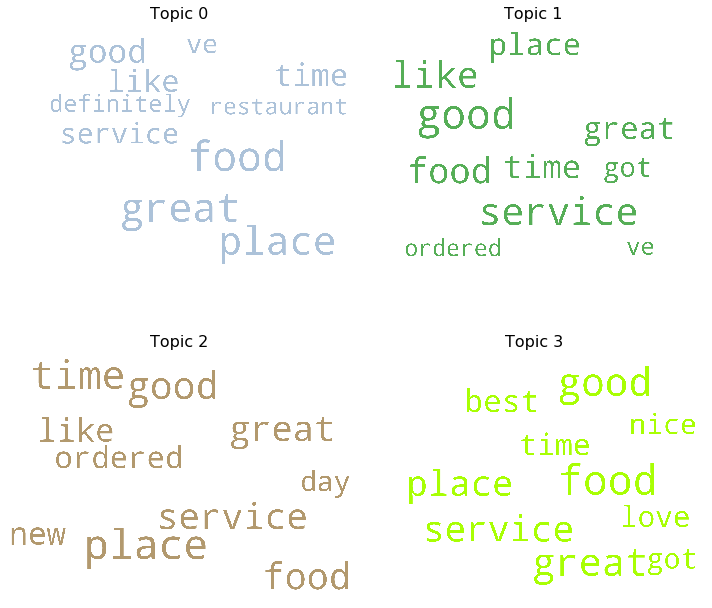

In [86]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.XKCD_COLORS.items()]

cloud = WordCloud(background_color='white',
                 width=2500,
                 height=1800,
                 max_words=10,
                 colormap='tab10',
                 color_func=lambda *args, **kwargs: cols[i],
                 prefer_horizontal=1)

topics = lda.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
  fig.add_subplot(ax)
  topic_words = dict(topics[i][1])
  cloud.generate_from_frequencies(topic_words, max_font_size=300)
  plt.gca().imshow(cloud)
  plt.gca().set_title('Topic '+str(i), fontdict=dict(size=16))
  plt.gca().axis('off')
  
  
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0,y=0)
plt.tight_layout()
plt.show()

In [87]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.6MB/s eta 0:00:01
     |████████████████████████████████| 184kB 6.5MB/s eta 0:00:01
     |████████████████████████████████| 225kB 5.3MB/s eta 0:00:01
     |████████████████████████████████| 829kB 8.3MB/s eta 0:00:01
     |████████████████████████████████| 92kB 3.5MB/s eta 0:00:01
     |████████████████████████████████| 61kB 3.0MB/s eta 0:00:01
  Stored in directory: /Users/Bearcave/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Stored in directory: /Users/Bearcave/Library/Caches/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built pyLDAvis future


In [91]:
!pip install bokeh


     |████████████████████████████████| 17.6MB 2.8MB/s eta 0:00:01    |████████████▍                   | 6.8MB 9.9MB/s eta 0:00:02     |██████████████▌                 | 8.0MB 9.9MB/s eta 0:00:01     |█████████████████████           | 11.5MB 9.9MB/s eta 0:00:01     |████████████████████████████    | 15.4MB 2.8MB/s eta 0:00:01
     |████████████████████████████████| 276kB 9.2MB/s eta 0:00:01
  Stored in directory: /Users/Bearcave/Library/Caches/pip/wheels/96/8c/18/ab51f7028839c79738fc7b21c7d660f3d59e7748eb903fbe15
  Stored in directory: /Users/Bearcave/Library/Caches/pip/wheels/16/27/a1/775c62ddea7bfa62324fd1f65847ed31c55dadb6051481ba3f
Successfully built bokeh PyYAML


In [92]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook


topic_weights = []
for row_list in lda[corpus]:
  tmp=np.zeros(10)
  for i, w in row_list:
    tmp[i]=w
  topic_weights.append(tmp)

  
arr = pd.DataFrame(topic_weights).fillna(0).values


arr = arr[np.amax(arr, axis=1) > 0.35]


topic_num = np.argmax(arr, axis=1)


tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

output_notebook()
n_topics = 10
mycolors = np.array([color for name, color in mcolors.XKCD_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9973 samples in 0.125s...
[t-SNE] Computed neighbors for 9973 samples in 0.856s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9973
[t-SNE] Computed conditional probabilities for sample 2000 / 9973
[t-SNE] Computed conditional probabilities for sample 3000 / 9973
[t-SNE] Computed conditional probabilities for sample 4000 / 9973
[t-SNE] Computed conditional probabilities for sample 5000 / 9973
[t-SNE] Computed conditional probabilities for sample 6000 / 9973
[t-SNE] Computed conditional probabilities for sample 7000 / 9973
[t-SNE] Computed conditional probabilities for sample 8000 / 9973
[t-SNE] Computed conditional probabilities for sample 9000 / 9973
[t-SNE] Computed conditional probabilities for sample 9973 / 9973
[t-SNE] Mean sigma: 0.000025
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.929264
[t-SNE] KL divergence after 1000 iterations: 0.563125


Loading BokehJS ...

My visuals tell me fairly little about the topics, other than that the model is capable of picking up synonyms and near-synonyms; a series of synonyms, however, do not really constitute a topic, but rather a sort of "mood." So the model did not work terribly well in this sense. 

Undoubtedly this is because, for the sake of getting the model to run, I had to limit the number of passes. Since the alpha and beta concentration parameters of the Dirichlet distributions (the first for topic concentration across documents, the second for concentration within documents) are estimated in a Bayesian fashion, they need a few passes to be able to efficiently estimate the distribution.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)